## Quant Analysis

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

quant_dataset = pd.read_csv('quant_errors.csv')
quant_dataset

,Unnamed: 0,book,question_number,topic,trial_number,score
0,0,manhattan_5lb,1,Mixed Geometry,trial_1,1
1,1,manhattan_5lb,2,Mixed Geometry,trial_1,0
2,2,manhattan_5lb,3,Mixed Geometry,trial_1,0
3,3,manhattan_5lb,4,Mixed Geometry,trial_1,0
4,4,manhattan_5lb,5,Mixed Geometry,trial_1,0
...,...,...,...,...,...,...
157,39,manhattan_5lb,40,prob_combinations,trial_1,1
158,40,manhattan_5lb,41,prob_combinations,trial_1,0
159,41,manhattan_5lb,42,prob_combinations,trial_1,1
160,42,manhattan_5lb,43,prob_combinations,trial_1,1


In [3]:
quant_dataset.describe(include = 'all')

,Unnamed: 0,book,question_number,topic,trial_number,score
count,162.000000,162,162.000000,162,162,162.000000
unique,NaN,1,NaN,6,1,NaN
top,NaN,manhattan_5lb,NaN,prob_combinations,trial_1,NaN
freq,NaN,162,NaN,44,162,NaN
mean,15.191358,NaN,16.191358,NaN,NaN,0.691358
std,11.213642,NaN,11.213642,NaN,NaN,0.463365
min,0.000000,NaN,1.000000,NaN,NaN,0.000000
25%,6.000000,NaN,7.000000,NaN,NaN,0.000000
50%,13.000000,NaN,14.000000,NaN,NaN,1.000000
75%,21.750000,NaN,22.750000,NaN,NaN,1.000000


In [4]:
quant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       162 non-null    int64 
 1   book             162 non-null    object
 2   question_number  162 non-null    int64 
 3   topic            162 non-null    object
 4   trial_number     162 non-null    object
 5   score            162 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 7.7+ KB


In [5]:
# percentage of overall score

round((quant_dataset['score'].sum()/len(quant_dataset['score'])) * 100)

69.0

In [18]:
# 

quant_dataset.groupby('topic')['score'].mean()

topic
Mixed Geometry        0.588235
Rect_polygon          0.571429
circle                0.739130
cordinate Geometry    0.764706
prob_combinations     0.727273
triangle              0.700000
Name: score, dtype: float64

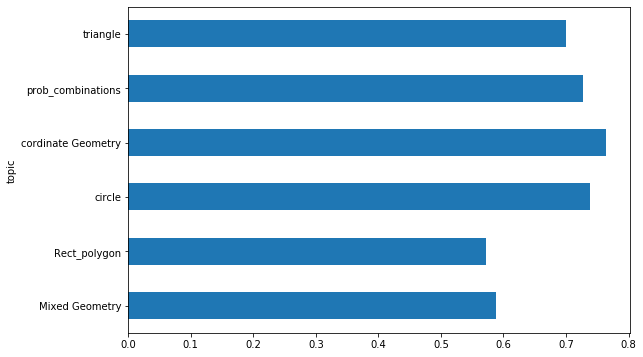

In [20]:
plt.figure(figsize = (9,6) )
quant_dataset.groupby('topic')['score'].mean().plot(kind = 'barh')
plt.show()

In [ ]:
# creating the error log dataframe

VR_error_log = pd.DataFrame()

# creating the columns of the dataframe

columns = ['book', 'question_number', 'topic', 'trial_number', 'score']

for i in columns:
    VR_error_log[i] = []

VR_error_log    

In [ ]:
#creating error log for quant


def add_subject(book, total_question, answered_wrongly, trial_number, question_type, topic):
    
    # listing out the question numbers
    question_number = [int(i) for i in range(1, total_question + 1)]
    
    # creating the score column
    score = []
    for i in range(len(question_number)):
        if question_number[i] in answered_wrongly:
            score.append(int(0))
        else:
            score.append(int(1))
            
    trial_number = [trial_number for i in range(total_question)]
    book = [book for i in range(total_question)]
    topic = [topic for i in range(total_question)]
    
    new_dataframe = pd.DataFrame({'book':book, 'question_number':question_number, 'topic':topic, 'trial_number':trial_number, 'score':score})
    
    return new_dataframe



In [ ]:
# adding information for the Mixed_geometry data
# parameters
book = 'manhattan_5lb'
total_question = 139
question_type = 'sentence_equivalence'
answered_wrongly = [1,3,4,9,12,20,22,23,24,26,30,34,37,40,47,54,57,60,64,65,72,73,74,76,77,81,82,88,89,91,94,95,101,108,115,117,119,120]
topic = 'sentence_equivalence'
trial_number = 'trial_1'

sentence_equivalence_errors = add_subject(book, total_question, answered_wrongly, trial_number, question_type, topic)    

# concatenating the this dataframe with error log dataframe
VR_error_log = pd.concat([VR_error_log,sentence_equivalence_errors], axis = 0)



# percentage score
round(sentence_equivalence_errors['score'].sum()/len(sentence_equivalence_errors['score']), 2)

In [ ]:
# creating proper data type

error_log['score'] = error_log['score'].astype('int')
error_log['question_number'] = error_log['question_number'].astype('int')

# saving the dataset as csv file

error_log.to_csv('VR_errors.csv')